In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint

from sklearn.datasets import load_digits
from sklearn.cluster import KMeans

digits = load_digits()

print(digits.keys())
print(digits['data'].shape)
print(digits['target'].shape)
print(digits['images'].shape)


dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
(1797, 64)
(1797,)
(1797, 8, 8)


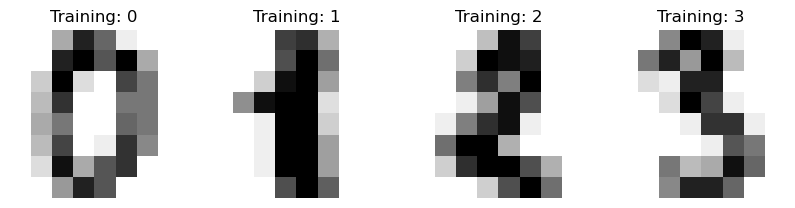

In [2]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [30]:
# essayons de grapper ces données d’images
N = digits['data']
km = KMeans(n_clusters=10, random_state=37, n_init='auto')
km.fit(N)

print(km.labels_[:20])
print(digits['target'][:20])


[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0 8 8 1 2 6 4 3 8 6 0 5 7 1 2 9 4 3 8 6]
[0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9]


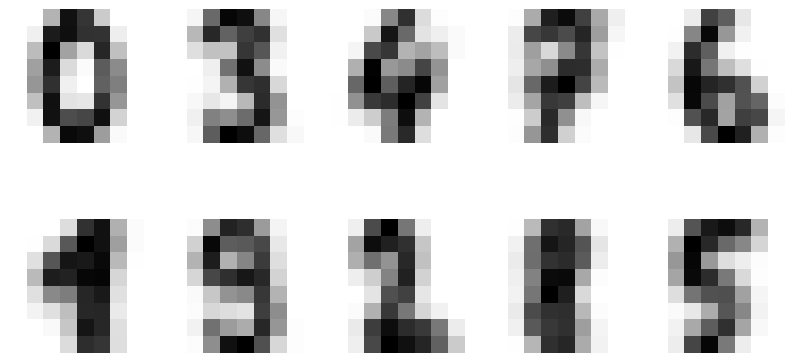

In [4]:
# création d’une matrice 8x8 à partir des centers de kmeans
centers = [np.reshape(c, (-1,8)) for c in km.cluster_centers_]

_, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 5))
for axe, image in zip(axes.reshape(1,10)[0], centers):
    axe.set_axis_off()
    axe.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")

In [9]:
from sklearn import datasets

Num_x, y = datasets.fetch_openml('mnist_784', parser='auto', return_X_y=True)
type(Num_x)

pandas.core.frame.DataFrame

In [41]:
print(Num_x.head(1).to_numpy().reshape(-1,28))

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

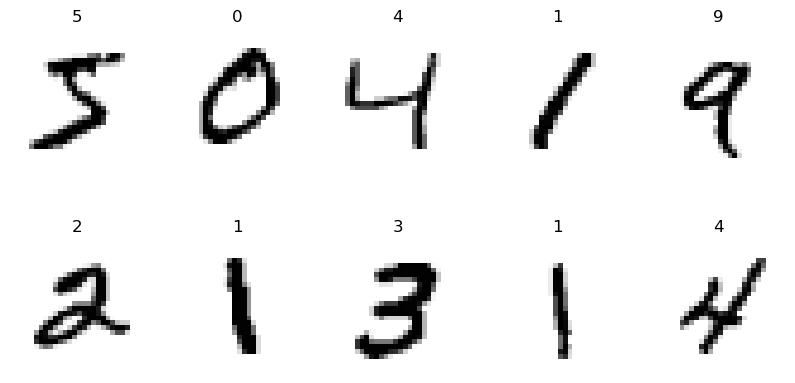

In [29]:
# On va le faire avec des plus grosses données

nums = Num_x.head(10).to_numpy()
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 5))

for num, axe, i in zip(nums, axes.reshape(1,10)[0], range(10)):
    img = np.reshape(num, (-1,28))
    axe.set_axis_off()
    axe.imshow(img, cmap=plt.cm.gray_r, interpolation="nearest")
    axe.set_title(y[i])



In [35]:
km = KMeans(n_clusters=10, random_state=70, n_init='auto')
km.fit(Num_x.to_numpy())

print(km.labels_[:20])
print(y.to_list()[:20])

[4 0 6 1 7 5 1 4 1 9 8 1 8 2 1 9 5 4 3 9]
['5', '0', '4', '1', '9', '2', '1', '3', '1', '4', '3', '5', '3', '6', '1', '7', '2', '8', '6', '9']


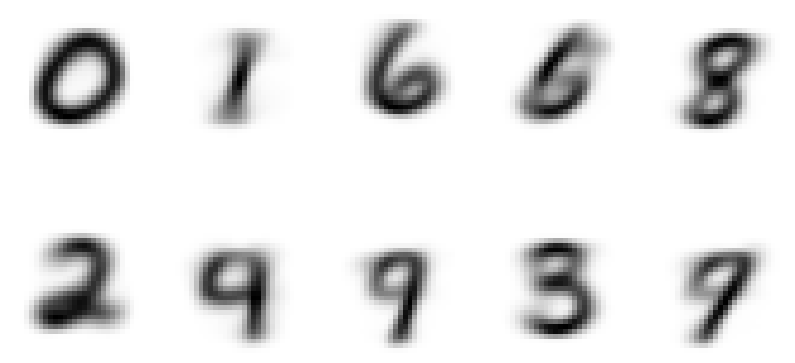

In [50]:
centers = [np.reshape(c, (-1,28)) for c in km.cluster_centers_]
centers = np.round(centers)

_, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 5))
for axe, image in zip(axes.reshape(1,10)[0], centers):
    axe.set_axis_off()
    axe.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")